<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/d_Copy_of_Copy_of_Concrete_Data_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
concrete_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro-to-KERAS/concrete_data.csv', encoding='ISO-8859-1')

In [ ]:
#sns.pairplot(concrete_df)

In [ ]:
concrete_df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:

X = concrete_df.drop(['Strength'], axis = 1)


In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [ ]:

input_shape=X_train.shape[1]

In [ ]:
X_train.shape

(721, 8)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()


In [ ]:
model = regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 3s - loss: 562.2426 - mse: 562.2426 - val_loss: 362.2547 - val_mse: 362.2547 - 3s/epoch - 193ms/step
Epoch 2/50
16/16 - 0s - loss: 425.1541 - mse: 425.1541 - val_loss: 318.3486 - val_mse: 318.3486 - 58ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 399.0692 - mse: 399.0692 - val_loss: 294.0049 - val_mse: 294.0049 - 67ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 372.0402 - mse: 372.0402 - val_loss: 277.1694 - val_mse: 277.1694 - 67ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 353.7391 - mse: 353.7391 - val_loss: 264.1818 - val_mse: 264.1818 - 70ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 340.0608 - mse: 340.0608 - val_loss: 251.2092 - val_mse: 251.2092 - 65ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 325.7543 - mse: 325.7543 - val_loss: 241.4414 - val_mse: 241.4414 - 67ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 315.2116 - mse: 315.2116 - val_loss: 233.0496 - val_mse: 233.0496 - 56ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 306.9915 -

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


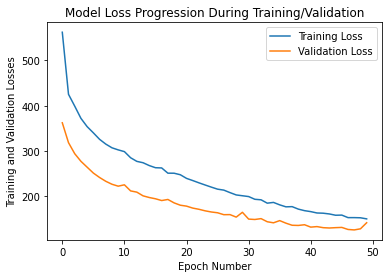

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

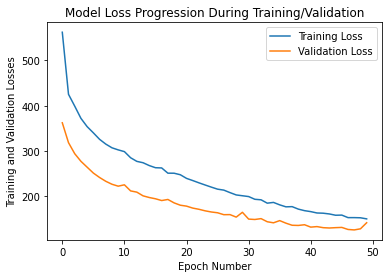

In [ ]:
plt.plot(epochs_hist.history['mse'])
plt.plot(epochs_hist.history['val_mse'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from keras.losses import mean_squared_error

In [ ]:
result = np.sqrt(mean_squared_error(y_test,y_pred))
result

array([34.948257, 22.136663, 26.232494, 21.903175, 17.135384, 18.647665,
       16.470787, 17.030115, 17.314468, 19.661388, 16.518692, 18.471184,
       29.509642, 23.599522, 17.324875, 19.53791 , 17.5445  , 16.461031,
       17.692179, 16.650642, 17.157537, 16.772205, 17.122837, 16.52078 ,
       16.853607, 16.534544, 21.820238, 17.863848, 16.594603, 16.595633,
       16.581163, 17.289948, 20.817287, 16.6263  , 16.803257, 18.4787  ,
       17.431877, 17.782604, 17.356726, 16.853037, 17.971878, 18.47836 ,
       16.582165, 20.770588, 18.064114, 26.178188, 21.265465, 31.546785,
       16.699553, 17.444803, 20.34095 , 17.644135, 17.310665, 16.482626,
       22.317028, 22.74667 , 17.736713, 20.562967, 17.61073 , 19.479723,
       17.73526 , 16.490625, 16.48271 , 23.172094, 16.579412, 18.882742,
       17.525354, 19.899347, 16.478994, 17.0281  , 17.092901, 17.2304  ,
       18.73367 , 16.52034 , 16.67123 , 17.847828, 35.682625, 17.14962 ,
       30.562496, 17.679024, 18.61367 , 21.749058, 

In [ ]:
from keras.losses import mean_squared_error

Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [29.79991  21.430515 28.481524 21.151848 20.659155 16.830887 18.611958
 16.930244 18.9001   16.615334 18.920042 22.696245 33.5661   22.100945
 17.43922  18.095589 16.677229 18.569185 16.537247 17.050241 16.478807
 17.21291  16.449306 19.792513 16.935398 17.276533 26.969217 16.612452
 17.335712 20.812893 16.449545 17.011333 17.904352 17.737856 17.40652
 16.609713 19.034822 16.542742 21.705568 16.655603 21.761711 24.157131
 17.530407 19.318434 20.72916  25.949526 20.641308 28.527483 21.869154
 23.416218 17.856306 16.477112 16.473064 17.279655 20.822351 21.76577
 19.685843 25.05727  17.663034 23.40465  16.526127 20.438591 16.590532
 23.242388 20.595615 19.974277 16.507153 23.738089 19.028536 18.41989
 22.908863 23.54722  27.207762 18.941153 18.168962 22.506165 30.5439
 16.964293 25.906239 22.368446 16.81423  21.66544  16.728607 18.147663
 37.781143 21.151848 16.708466 16.52794  18.887474 20.029903 18.352879
 27.034636 20.342007 19.7626   17.346266 20.864838 18.472303 19.084

A. Results
Report mean square MSE and std square MSE

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(MSE_List)
std_sqmse_A  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,20.045368,4.04902


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PART-B  -NORMALIZE THE DATA

In [ ]:
X = concrete_df.drop(['Strength'], axis = 1)

In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
model = regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0121 - val_mse: 0.0121 - 836ms/epoch - 52ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 67ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 58ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 68ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 59ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 56ms/epoch - 3ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 67ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 71ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 69ms/epoch -

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [18.777958 16.825922 18.004137 16.796808 16.480967 16.467686 16.463203
 17.289915 16.57258  16.45041  16.449757 16.934273 18.90916  16.825533
 16.449635 16.449186 16.456684 16.61269  16.469    16.48574  16.452553
 16.486893 16.724434 16.615152 16.450705 16.704403 16.620787 16.477571
 17.074385 16.797588 16.46249  16.568079 16.50723  17.189121 16.462214
 16.59445  16.518637 16.485846 16.677336 16.72572  16.58493  16.758194
 16.473257 17.228407 16.460077 17.184553 17.120369 18.766972 16.569628
 16.682758 16.454763 16.455442 16.450989 16.470636 16.48539  16.739588
 16.519714 16.673447 16.645514 16.558418 16.477114 17.216028 16.689123
 17.28946  16.570492 16.449305 16.455635 16.483738 16.497684 16.45552
 16.811422 16.616812 16.809195 16.449728 16.459929 16.456593 18.730932
 17.250147 16.640463 16.44935  17.514935 16.787165 16.449825 16.504854
 19.091352 16.796808 16.471773 16.455462 16.46725  16.450508 16.539255
 17.538868 16.44928  16.518492 16.44998  17.476532 16.45879  16

In [ ]:
mean_sqmse_B = np.mean(MSE_List)
std_sqmse_B  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["B"],"mean_sq_mse": [mean_sqmse_B], "std_sq_mse": [std_sqmse_B]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,B,16.713417,0.432283


COMPARISON OF A ND B RESULTS

In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["A","B"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B]})
Results

,Part,mean_sq_mse,std_sq_mse
0,A,20.045368,4.049020
1,B,16.713417,0.432283


COMPARISON OF EPOCHS-50,EPOCHS-50(Normalized)

In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50","EPOCHS-50(Normalized)"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50,20.045368,4.049020
1,EPOCHS-50(Normalized),16.713417,0.432283


PART-D ..EPOCH=50,WITH HIDDEN LAYERS 3,EACH 10 NODES


In [ ]:
X = concrete_df.drop(['Strength'], axis = 1)

In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))
  model.add(Dense(10))
  model.add(Dense(10))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()

In [ ]:
model=regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0124 - val_mse: 0.0124 - 975ms/epoch - 61ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0125 - val_mse: 0.0125 - 98ms/epoch - 6ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0121 - val_mse: 0.0121 - 124ms/epoch - 8ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0120 - val_mse: 0.0120 - 109ms/epoch - 7ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 155ms/epoch - 10ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 120ms/epoch - 8ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 159ms/epoch - 10ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 195ms/epoch - 12ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 101

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [28.734627 22.840399 34.72499  22.563005 22.79807  16.905148 18.509977
 18.357504 17.258175 16.619236 16.63927  21.35492  41.935184 22.91591
 18.680738 16.712952 17.029205 18.310778 16.453447 17.159132 16.502222
 19.338316 16.576626 19.294523 16.690939 16.449514 24.45553  17.854584
 17.173973 19.945417 16.458694 16.8976   17.284817 18.52246  17.527647
 16.693146 17.733772 17.003366 22.314445 16.749952 20.694323 24.496521
 17.282894 21.575665 21.397545 25.882431 24.261457 28.083866 20.574572
 21.965399 17.122873 16.45948  17.31429  17.259045 17.940462 22.027172
 17.735348 23.169455 17.046581 21.889519 16.90888  20.358772 16.910795
 28.045382 19.708673 18.649818 16.523209 21.82899  18.800201 18.591934
 22.489002 21.945208 24.804106 16.644638 17.8194   22.00508  29.351065
 19.020554 21.359518 20.835163 16.961365 20.764797 16.679949 17.44325
 35.153057 22.563005 16.483208 16.604952 18.444223 20.707117 17.998991
 28.123339 19.840916 18.21519  16.761562 20.662891 18.269428 17.

 mean and the standard deviation of the mean squared errors.

In [ ]:
mean_sqmse_D = np.mean(MSE_List)
std_sqmse_D  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["D"],"mean_sq_mse": [mean_sqmse_D], "std_sq_mse": [std_sqmse_D]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,D,19.777245,4.204247


COMPARISION OF A,B,D--(EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS)FOR THEIR MEAN AND STD OF MEAN SQAURED ERRORS)


In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B,mean_sqmse_D], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B,std_sqmse_D]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50,20.045368,4.049020
1,EPOCHS-50(Normalized),16.713417,0.432283
2,EPOCHS-50(Normalized)-3-HIDDEN-LAYERS,19.777245,4.204247
